<a href="https://colab.research.google.com/github/MahalakshmiDSML/Study-guide/blob/main/Feature_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering

#Categorical Data Transformation

#1.Lable Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Sample dataset
data = {'Size': ['Low', 'Moderate', 'Severe', 'Moderate', 'Low']}
df = pd.DataFrame(data)
df

,Size
0,Low
1,Moderate
2,Severe
3,Moderate
4,Low


In [ ]:
labelencoder=LabelEncoder()
#use fit_transform
df['encoded_size']=labelencoder.fit_transform(df['Size'])
df

,Size,encoded_size
0,Low,0
1,Moderate,1
2,Severe,2
3,Moderate,1
4,Low,0


#2.One Hot Encoding

In [ ]:
import pandas as pd

# Sample dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'City': ['Chennai', 'Chennai', 'Coimbatore', 'Coimbatore', 'Madurai']
}
# Convert to DataFrame
df = pd.DataFrame(data)
print(df)

   CustomerID        City
0           1     Chennai
1           2     Chennai
2           3  Coimbatore
3           4  Coimbatore
4           5     Madurai


In [ ]:
df_one_hot=pd.get_dummies(df.City,prefix='City')
df_one_hot=df_one_hot.astype(int)
df_one_hot

,City_Chennai,City_Coimbatore,City_Madurai
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


In [ ]:
newdf=pd.concat([df,df_one_hot],axis=1)
newdf

,CustomerID,City,City_Chennai,City_Coimbatore,City_Madurai
0,1,Chennai,1,0,0
1,2,Chennai,1,0,0
2,3,Coimbatore,0,1,0
3,4,Coimbatore,0,1,0
4,5,Madurai,0,0,1


#Feature Scaling

#1.Normalization

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = {
    'Area': [2500, 1800, 3200, 1500, 2100],
    'Bedrooms': [3, 2, 4, 2, 3],
    'Distance': [10, 15, 8, 20, 12]
}
df = pd.DataFrame(data)
df

,Area,Bedrooms,Distance
0,2500,3,10
1,1800,2,15
2,3200,4,8
3,1500,2,20
4,2100,3,12


In [ ]:
scaler=MinMaxScaler()
df_normalized=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_normalized

,Area,Bedrooms,Distance
0,0.588235,0.5,0.166667
1,0.176471,0.0,0.583333
2,1.000000,1.0,0.000000
3,0.000000,0.0,1.000000
4,0.352941,0.5,0.333333


In [ ]:
df.columns

Index(['Area', 'Bedrooms', 'Distance'], dtype='object')

#2.Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sample dataset
data = {
    'Area': [2500, 1800, 3200, 1500, 2100],
    'Bedrooms': [3, 2, 4, 2, 3],
    'Distance': [10, 15, 8, 20, 12]
}
df = pd.DataFrame(data)
df

,Area,Bedrooms,Distance
0,2500,3,10
1,1800,2,15
2,3200,4,8
3,1500,2,20
4,2100,3,12


In [ ]:
scaler=StandardScaler()
df_standardised=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_standardised

,Area,Bedrooms,Distance
0,0.473557,0.267261,-0.715097
1,-0.710336,-1.069045,0.476731
2,1.657450,1.603567,-1.191828
3,-1.217718,-1.069045,1.668560
4,-0.202953,0.267261,-0.238366


#Feature Selection

#1.SelectKBest

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Sample dataset
data = {
    'Age': [25, 45, 35, 50, 23],
    'Income': [50000, 120000, 75000, 100000, 35000],
    'Tenure': [2, 5, 3, 6, 1],
    'Churn': [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
df

,Age,Income,Tenure,Churn
0,25,50000,2,0
1,45,120000,5,1
2,35,75000,3,0
3,50,100000,6,1
4,23,35000,1,0


In [ ]:
X=df[['Age','Income','Tenure']] #Input Feature
y=df['Churn'] #Target Feature

In [ ]:
  # Apply SelectKBest to select top 2 features
  selector=SelectKBest(score_func=f_classif,k=2) #score and top2 Features True
  X_new=selector.fit_transform(X,y)
  feature_scores=selector.scores_
  print(feature_scores)

[14.88021016 11.3704918  17.64      ]


In [ ]:
X.columns[selector.get_support(indices=True)]

Index(['Age', 'Tenure'], dtype='object')

In [ ]:
print("Selected features (Top 2):", X.columns[selector.get_support(indices=True)])

Selected features (Top 2): Index(['Age', 'Tenure'], dtype='object')


In [ ]:
selected_DF=pd.DataFrame(X_new, columns=X.columns[selector.get_support(indices=True)])
selected_DF

,Age,Tenure
0,25,2
1,45,5
2,35,3
3,50,6
4,23,1


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Sample dataset
data = {
    'Age': [25, 45, 35, 50, 23],
    'Income': [50000, 120000, 75000, 100000, 35000],
    'Tenure': [2, 5, 3, 6, 1],
    'Churn': [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
X=df[['Age','Income','Tenure']]
y=df['Churn']
# Apply SelectKBest to select top 2 features
selector=SelectKBest(score_func=f_classif,k=2) #score and top2 Features True
X_new=selector.fit_transform(X,y)
feature_scores=selector.scores_
print(feature_scores)
print("Selected features (Top 2):", X.columns[selector.get_support(indices=True)])
print("Transformed dataset with selected features:\n", pd.DataFrame(X_new, columns=X.columns[selector.get_support(indices=True)]))

[14.88021016 11.3704918  17.64      ]
Selected features (Top 2): Index(['Age', 'Tenure'], dtype='object')
Transformed dataset with selected features:
    Age  Tenure
0   25       2
1   45       5
2   35       3
3   50       6
4   23       1


#2.Correlation Based Feature Selection

In [ ]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    'Size': [1500, 1600, 1700, 1400, 1800],
    'Rooms': [3, 4, 4, 3, 5],
    'Year Built': [2000, 2010, 2015, 1995, 2020],
    'Distance to City Center': [10, 15, 7, 12, 8],
    'Price': [300000, 350000, 400000, 280000, 450000]
}
df = pd.DataFrame(data)
df

,Size,Rooms,Year Built,Distance to City Center,Price
0,1500,3,2000,10,300000
1,1600,4,2010,15,350000
2,1700,4,2015,7,400000
3,1400,3,1995,12,280000
4,1800,5,2020,8,450000


In [ ]:
# Step 1: Calculate the correlation matrix
corr_matrix=df.corr()
corr_matrix

,Size,Rooms,Year Built,Distance to City Center,Price
Size,1.000000,0.944911,0.991241,-0.541931,0.990830
Rooms,0.944911,1.000000,0.951044,-0.335178,0.961781
Year Built,0.991241,0.951044,1.000000,-0.458297,0.982151
Distance to City Center,-0.541931,-0.335178,-0.458297,1.000000,-0.556931
Price,0.990830,0.961781,0.982151,-0.556931,1.000000


<Axes: >

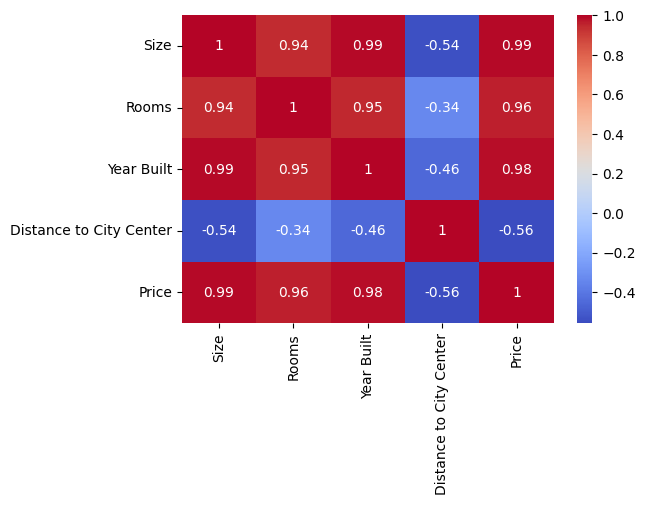

In [ ]:
# Plotting the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [ ]:
target_corr=corr_matrix['Price']
target_corr

,Price
Size,0.990830
Rooms,0.961781
Year Built,0.982151
Distance to City Center,-0.556931
Price,1.000000


In [ ]:
target_corr=corr_matrix['Price'].abs().sort_values(ascending=False)
target_corr


,Price
Price,1.000000
Size,0.990830
Year Built,0.982151
Rooms,0.961781
Distance to City Center,0.556931


In [ ]:
inter_feature_corr=corr_matrix.drop('Price',axis=1).drop('Price',axis=0).abs()
inter_feature_corr

,Size,Rooms,Year Built,Distance to City Center
Size,1.000000,0.944911,0.991241,0.541931
Rooms,0.944911,1.000000,0.951044,0.335178
Year Built,0.991241,0.951044,1.000000,0.458297
Distance to City Center,0.541931,0.335178,0.458297,1.000000


In [ ]:
selected_features = []
print("Feature Selection Process:")
for feature in target_corr.index:
  if feature=='Price':
    continue
  # Check inter-correlation with already selected features
  if all(inter_feature_corr[feature].loc[selected_features] <0.75):
    selected_features.append(feature)
    print(f"Selected: {feature} (correlation with Price:){target_corr[feature]}")
  else:
    print(f"Rejected: {feature} due to high inter-correlation")
#final selected features
print("\nFinal Selected Features:")
print(selected_features)

Feature Selection Process:
Selected: Size (correlation with Price:)0.9908301680442989
Rejected: Year Built due to high inter-correlation
Rejected: Rooms due to high inter-correlation
Selected: Distance to City Center (correlation with Price:)0.5569313353179229

Final Selected Features:
['Size', 'Distance to City Center']


#Train Test Split

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split


data = {
    'Size': [1500, 1600, 1700, 1400, 1800, 1900, 2000, 1750, 1850, 1650, 1550, 1450],
    'Rooms': [3, 4, 4, 3, 5, 4, 5, 4, 3, 4, 3, 3],
    'Year Built': [2000, 2010, 2015, 1995, 2020, 2005, 2018, 2008, 2016, 2011, 1999, 1997],
    'Distance to City Center': [10, 15, 7, 12, 8, 5, 18, 14, 7, 13, 9, 10],
    'Price': [300000, 350000, 400000, 280000, 450000, 420000, 480000, 370000, 440000, 360000, 310000, 290000]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

In [ ]:
df.shape

(12, 5)

In [ ]:
df

,Size,Rooms,Year Built,Distance to City Center,Price
0,1500,3,2000,10,300000
1,1600,4,2010,15,350000
2,1700,4,2015,7,400000
3,1400,3,1995,12,280000
4,1800,5,2020,8,450000
5,1900,4,2005,5,420000
6,2000,5,2018,18,480000
7,1750,4,2008,14,370000
8,1850,3,2016,7,440000
9,1650,4,2011,13,360000


#After Feature Selection lets keep only essential features


In [ ]:
newdf= df[['Size', 'Distance to City Center','Price']]
newdf

,Size,Distance to City Center,Price
0,1500,10,300000
1,1600,15,350000
2,1700,7,400000
3,1400,12,280000
4,1800,8,450000
5,1900,5,420000
6,2000,18,480000
7,1750,14,370000
8,1850,7,440000
9,1650,13,360000


In [ ]:
newdf.shape

(12, 3)

#Sample EDA

In [ ]:
# Summary statistics
print(df.describe())


              Size      Rooms   Year Built  Distance to City Center  \
count    12.000000  12.000000    12.000000                12.000000   
mean   1679.166667   3.750000  2007.833333                10.666667   
std     187.638837   0.753778     8.600564                 3.821788   
min    1400.000000   3.000000  1995.000000                 5.000000   
25%    1537.500000   3.000000  1999.750000                 7.750000   
50%    1675.000000   4.000000  2009.000000                10.000000   
75%    1812.500000   4.000000  2015.250000                13.250000   
max    2000.000000   5.000000  2020.000000                18.000000   

               Price  
count      12.000000  
mean   370833.333333  
std     67616.341937  
min    280000.000000  
25%    307500.000000  
50%    365000.000000  
75%    425000.000000  
max    480000.000000  


In [ ]:
# Checking for missing values
print(df.isnull().sum())

Size                       0
Rooms                      0
Year Built                 0
Distance to City Center    0
Price                      0
dtype: int64


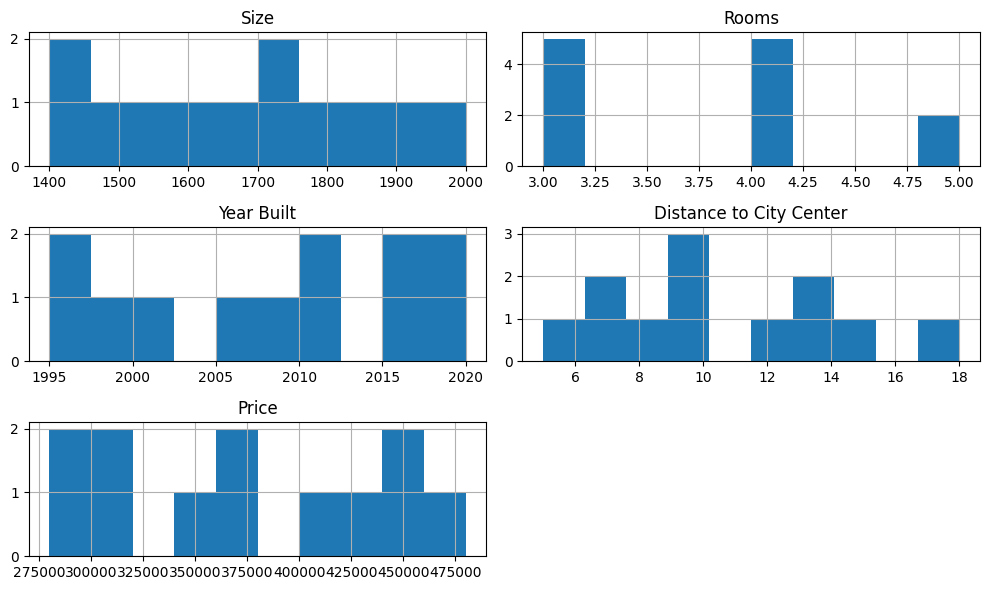

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms for all features
df.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Displaying the correlation matrix
print(correlation_matrix)


                             Size     Rooms  Year Built  \
Size                     1.000000  0.698989    0.789122   
Rooms                    0.698989  1.000000    0.764246   
Year Built               0.789122  0.764246    1.000000   
Distance to City Center  0.002113  0.315571    0.081129   
Price                    0.961640  0.753596    0.900693   

                         Distance to City Center     Price  
Size                                    0.002113  0.961640  
Rooms                                   0.315571  0.753596  
Year Built                              0.081129  0.900693  
Distance to City Center                 1.000000 -0.030489  
Price                                  -0.030489  1.000000  


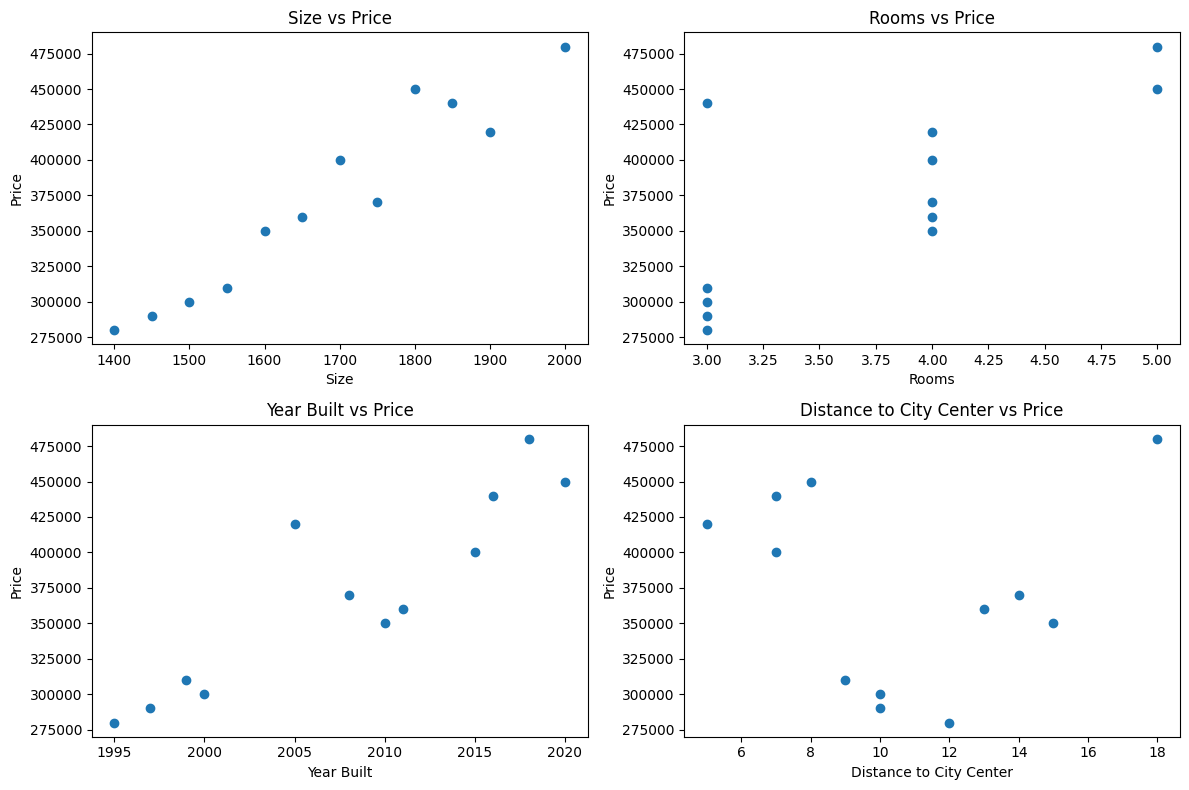

In [ ]:
# Scatter plots of features vs. Price
plt.figure(figsize=(12, 8))

# Size vs. Price
plt.subplot(2, 2, 1)
plt.scatter(df['Size'], df['Price'])
plt.title('Size vs Price')
plt.xlabel('Size')
plt.ylabel('Price')

# Rooms vs. Price
plt.subplot(2, 2, 2)
plt.scatter(df['Rooms'], df['Price'])
plt.title('Rooms vs Price')
plt.xlabel('Rooms')
plt.ylabel('Price')

# Year Built vs. Price
plt.subplot(2, 2, 3)
plt.scatter(df['Year Built'], df['Price'])
plt.title('Year Built vs Price')
plt.xlabel('Year Built')
plt.ylabel('Price')

# Distance to City Center vs. Price
plt.subplot(2, 2, 4)
plt.scatter(df['Distance to City Center'], df['Price'])
plt.title('Distance to City Center vs Price')
plt.xlabel('Distance to City Center')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

#train test split

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Creating the dataset with 12 data points
data = {
    'Size': [1500, 1600, 1700, 1400, 1800, 1900, 2000, 1750, 1850, 1650, 1550, 1450],
    'Rooms': [3, 4, 4, 3, 5, 4, 5, 4, 3, 4, 3, 3],
    'Year Built': [2000, 2010, 2015, 1995, 2020, 2005, 2018, 2008, 2016, 2011, 1999, 1997],
    'Distance to City Center': [10, 15, 7, 12, 8, 5, 18, 14, 7, 13, 9, 10],
    'Price': [300000, 350000, 400000, 280000, 450000, 420000, 480000, 370000, 440000, 360000, 310000, 290000]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)
newdf= df[['Size', 'Distance to City Center','Price']]
# Splitting into Training (80%) and Test (20%) sets
X = newdf[['Size', 'Distance to City Center']]  # Features
y = newdf['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Actual Dataframe shape:",newdf.shape)
# Checking the shape of Train and Test sets
print("Train Data Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test Data Shape (X_test, y_test):", X_test.shape, y_test.shape)

Actual Dataframe shape: (12, 3)
Train Data Shape (X_train, y_train): (9, 2) (9,)
Test Data Shape (X_test, y_test): (3, 2) (3,)


#importance of Random state

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Creating the dataset with 12 data points
data = {
    'Size': [1500, 1600, 1700, 1400, 1800, 1900, 2000, 1750, 1850, 1650, 1550, 1450],
    'Rooms': [3, 4, 4, 3, 5, 4, 5, 4, 3, 4, 3, 3],
    'Year Built': [2000, 2010, 2015, 1995, 2020, 2005, 2018, 2008, 2016, 2011, 1999, 1997],
    'Distance to City Center': [10, 15, 7, 12, 8, 5, 18, 14, 7, 13, 9, 10],
    'Price': [300000, 350000, 400000, 280000, 450000, 420000, 480000, 370000, 440000, 360000, 310000, 290000]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Features and target variable
X = df[['Size', 'Rooms', 'Year Built', 'Distance to City Center']]  # Features
y = df['Price']  # Target variable

# Split using random_state (to ensure reproducibility)
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X, y, test_size=0.3, random_state=42)

# Split without using random_state (randomly changes each time)
X_train_no_rs, X_test_no_rs, y_train_no_rs, y_test_no_rs = train_test_split(X, y, test_size=0.3)

# Display the splits
print("Train/Test Split using random_state=42:")
print("\nX_train_rs:")
print(X_train_rs)
print("\nX_test_rs:")
print(X_test_rs)

print("\n\nTrain/Test Split without random_state:")
print("\nX_train_no_rs:")
print(X_train_no_rs)
print("\nX_test_no_rs:")
print(X_test_no_rs)

Train/Test Split using random_state=42:

X_train_rs:
    Size  Rooms  Year Built  Distance to City Center
5   1900      4        2005                        5
2   1700      4        2015                        7
1   1600      4        2010                       15
11  1450      3        1997                       10
4   1800      5        2020                        8
7   1750      4        2008                       14
3   1400      3        1995                       12
6   2000      5        2018                       18

X_test_rs:
    Size  Rooms  Year Built  Distance to City Center
10  1550      3        1999                        9
9   1650      4        2011                       13
0   1500      3        2000                       10
8   1850      3        2016                        7


Train/Test Split without random_state:

X_train_no_rs:
    Size  Rooms  Year Built  Distance to City Center
0   1500      3        2000                       10
2   1700      4        2015   

With random_state=42: The split is reproducible, meaning every time you run the code, you'll get the same train and test data.
Without random_state: The split will be random each time, resulting in different splits on different executions.

#recheck random state

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Creating the dataset with 12 data points
data = {
    'Size': [1500, 1600, 1700, 1400, 1800, 1900, 2000, 1750, 1850, 1650, 1550, 1450],
    'Rooms': [3, 4, 4, 3, 5, 4, 5, 4, 3, 4, 3, 3],
    'Year Built': [2000, 2010, 2015, 1995, 2020, 2005, 2018, 2008, 2016, 2011, 1999, 1997],
    'Distance to City Center': [10, 15, 7, 12, 8, 5, 18, 14, 7, 13, 9, 10],
    'Price': [300000, 350000, 400000, 280000, 450000, 420000, 480000, 370000, 440000, 360000, 310000, 290000]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Features and target variable
X = df[['Size', 'Rooms', 'Year Built', 'Distance to City Center']]  # Features
y = df['Price']  # Target variable

# Split using random_state (to ensure reproducibility)
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X, y, test_size=0.3, random_state=42)

# Split without using random_state (randomly changes each time)
X_train_no_rs, X_test_no_rs, y_train_no_rs, y_test_no_rs = train_test_split(X, y, test_size=0.3)

# Display the splits
print("Train/Test Split using random_state=42:")
print("\nX_train_rs:")
print(X_train_rs)
print("\nX_test_rs:")
print(X_test_rs)

print("\n\nTrain/Test Split without random_state:")
print("\nX_train_no_rs:")
print(X_train_no_rs)
print("\nX_test_no_rs:")
print(X_test_no_rs)

Train/Test Split using random_state=42:

X_train_rs:
    Size  Rooms  Year Built  Distance to City Center
5   1900      4        2005                        5
2   1700      4        2015                        7
1   1600      4        2010                       15
11  1450      3        1997                       10
4   1800      5        2020                        8
7   1750      4        2008                       14
3   1400      3        1995                       12
6   2000      5        2018                       18

X_test_rs:
    Size  Rooms  Year Built  Distance to City Center
10  1550      3        1999                        9
9   1650      4        2011                       13
0   1500      3        2000                       10
8   1850      3        2016                        7


Train/Test Split without random_state:

X_train_no_rs:
    Size  Rooms  Year Built  Distance to City Center
11  1450      3        1997                       10
2   1700      4        2015   

In [ ]:

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
ypred = model.predict(X_test)



# Comparing y_test and ypred
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})
print("\nComparison of Actual vs Predicted:")
print(comparison)

# Calculate Mean Absolute Error (MAE) to evaluate the prediction
mae = mean_absolute_error(y_test, ypred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")


Comparison of Actual vs Predicted:
    Actual      Predicted
10  310000  317955.027643
9   360000  374265.773998
0   300000  308523.122282

Mean Absolute Error (MAE): 10247.97


#Splitting data into Train data, Validation Data, Test Data

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
# Splitting into Training (70%), Validation (15%), and Test (15%) sets

X = newdf[['Size', 'Distance to City Center']]  # Features
y = newdf['Price']  # Target variable

# First, split into Train + Validation and Test sets (85%, 15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second Split Training + Validation set into Train and Validation sets (70%, 15%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
ypred = model.predict(X_test)

# Checking the shape of Train, Validation, and Test sets
print("Train Data Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation Data Shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Test Data Shape (X_test, y_test):", X_test.shape, y_test.shape)

# Comparing y_test and ypred
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})
print("\nComparison of Actual vs Predicted:")
print(comparison)

# Calculate Mean Absolute Error (MAE) to evaluate the prediction
mae = mean_absolute_error(y_test, ypred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")

Train Data Shape (X_train, y_train): (8, 2) (8,)
Validation Data Shape (X_val, y_val): (2, 2) (2,)
Test Data Shape (X_test, y_test): (2, 2) (2,)

Comparison of Actual vs Predicted:
    Actual      Predicted
10  310000  328414.197927
9   360000  359958.176649

Mean Absolute Error (MAE): 9228.01
